# Testing the forward Euler method for different variations of $\Delta t$ and $\Delta x$ on the diffusion equation in 1D. 

### In this jupyter notebook we study how the solution of the forward Euler method behaves for different combinations of $\Delta t$ and $\Delta x$. We will test for combinations close to the limit an away from the limit. The stability criterion is $\Delta t \leq \frac{1}{2}\Delta x^2$

Time used forward Euler:  0.0039899349212646484  seconds


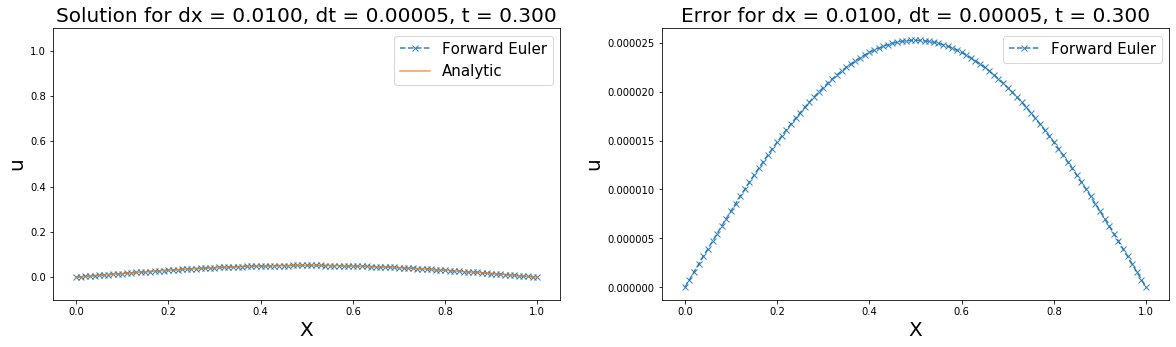

MSE forward Euler =  3.1814208285539826e-08


In [7]:
from diffusion_solvers import forward_euler, analytic_solution_1D
import numpy as np 
import matplotlib.pyplot as plt 

x_min = 0
x_max = 1

#Choose steplengths to test for different grid sizes. 
dx = 0.01    #Spatial step
dt = 0.00005#0.5*(dx**2)#1e-3   #Time-step

t = 1  #Max time

num_x_values = (x_max - x_min)/dx
num_t_values = float(t)/dt

x_values = np.linspace(x_min, x_max, num_x_values +1)
t_values = np.linspace(0, t, num_t_values+1)

#Defining the boundary and intitial conditions.
g = (lambda x : np.sin(np.pi*x))
a = (lambda t : 0)
b = (lambda t : 0)

#Choose time to plot and calculate the index of this time.
plot_time = 0.3
plot_index = int(plot_time*t/dt)

params = {'figure.figsize': (20, 5), "legend.fontsize":15, "axes.labelsize": 15}
plt.rcParams.update(params)

plt.subplot(121)


#Plotting the solution from the different numerical methods.
u_forward_euler = forward_euler(x_min, x_max, dx, dt, t, g, a, b)
analytic_solution = analytic_solution_1D(x_values, t_values[plot_index])


plt.plot(x_values, u_forward_euler[plot_index,:], linestyle="--", marker = "x", alpha = 0.9)

plt.plot(x_values, analytic_solution, alpha = 0.8)

plt.legend(["Forward Euler","Analytic"])
plt.title("Solution for dx = %.4f, dt = %.5f, t = %.3f" %(dx,dt, plot_time), fontsize=20)
plt.xlabel("X", fontsize=20)
plt.ylabel("u", fontsize=20)
plt.ylim(-0.1,1.1)

plt.subplot(122)

#Plotting the error for the different numerical methods compared to the analytical solution.
error_forward_euler = analytic_solution - u_forward_euler[plot_index,:]

plt.plot(x_values, (error_forward_euler), linestyle="--",marker="x", alpha= 0.9)


# plt.scatter(x_values, (error_forward_euler), alpha = 0.5, s = 20)
# plt.scatter(x_values, (error_backward_euler), alpha = 0.5, s=20)
# plt.scatter(x_values, (error_cn), alpha = 0.5,s=20)

plt.xlabel("X", fontsize=20)
plt.ylabel("u", fontsize=20)
plt.title("Error for dx = %.4f, dt = %.5f, t = %.3f" %(dx,dt, plot_time), fontsize=20)
plt.legend(["Forward Euler"])
plt.subplots_adjust( wspace=0.2)

filename = ("solution_and_error_1D_dt_%s_dx_%s_t_%.3f.png"%(dt,dx, plot_time)).replace(".","_",3)
plt.savefig(r"Plots/" + filename)

plt.show()

print("MSE forward Euler = ", np.mean(sum(error_forward_euler**2)))
